# Serie storiche: pre-processing con le Pandas

Dal sito di meteo trentino http://storico.meteotrentino.it/ sono stati scaricati i dati di Trento Laste (id stazione T0129)

Carichiamo i dati e poi creiamo un dataframe usando le librerie Pandas. Attenzione all'**encoding**, cioè lo standard di codifica per visualizzare i caratteri. Le codifiche più comuni sono UTF-8 e per le lingue occidentali ISO/IEC 8859-1.


In [ ]:
import pandas as pd

# URL raw del file
url = "https://raw.githubusercontent.com/martmartini/IAalmartini/1635bcef0c30a4466dc83f1ee1d0f1ae15e600ca/corsopy/data/T0129.csv"

df = pd.read_csv(url, sep=",", header=3, encoding= "ISO-8859-1")

df.head()

Visualizziamo velocemente il dataframe e plottiamo i dati non processati. Ci accorgiamo di una serie di problemi:


*   *Formattazione* dataframe (Intestazione delle colonne non chiare, ultima colonna con legenda qualità del dato da eliminare e salvare in un'altra struttura, controllare i tipi di dato in modo che siano coerenti, etc...)
*   Qualità del dato, sono necessari ulteriori controlli?
*   Mancanza di dati

## Formattazione dataframe



### Intestazione colonne

Iniziamo a sistemare i nomi delle colonne in modo da rendere i dati leggibili e riconoscibili.

Proviamo a leggere l'intestazione alla riga 2 del csv e assegnarla a dataframe precedente.

```
cols=pd.read_csv("/content/drive/MyDrive/new_generation/samples/T0129.csv", sep=",", header=2, encoding= "ISO-8859-1", nrows=0)
print(cols.columns)
```
Se stampiamo le colonne otteniamo **header 2**:

```
Index(['Date', 'Pioggia (mm)', 'Unnamed: 2', 'Temp. aria (°C)', 'Unnamed: 4',
       'Temp. aria (°C).1', 'Unnamed: 6', 'Temp. aria (°C).2', 'Unnamed: 8',
       'Umidita' aria (%)', 'Unnamed: 10', 'Dir. Vento (°)', 'Unnamed: 12',
       'Vel. Vento (m/s)', 'Unnamed: 14', 'Pressione atm. (hPa)',
       'Unnamed: 16', 'Rad.Sol.Tot. (kJ/m2)', 'Unnamed: 18'],
      dtype='object')

```

I nomi delle colonne del dataframe df **header 3** sono invece:

```
Index(['Unnamed: 0', 'Total', 'Qual', 'Mean', 'Qual.1', 'Min', 'Qual.2', 'Max',
       'Qual.3', 'Mean.1', 'Qual.4', 'Mean.2', 'Qual.5', 'Mean.3', 'Qual.6',
       'Mean.4', 'Qual.7', 'Total.1', 'Qual.8'],
      dtype='object')
```

Proviamo a creare una lista con i nomi delle colonne dell'header 2 unito con l'header 3.

Dove abbiamo *Unnamed* nell'header 2 mettiamo l'elemento precedente nell'header 3 lasciamo la stringa vuota.
Per l'header 3, se abbiamo il . nella penultima posizione eliminiamo gli ultimi due caratteri.

Proviamo poi a unire le informazioni dei due header e rinominare le colonne.

In [ ]:
cols=pd.read_csv("/content/drive/MyDrive/new_generation/samples/T0129.csv", sep=",", header=2, encoding= "ISO-8859-1", nrows=0)
print(cols.columns) #header 2
print(df.columns)

Index(['Date', 'Pioggia (mm)', 'Unnamed: 2', 'Temp. aria (°C)', 'Unnamed: 4',
       'Temp. aria (°C).1', 'Unnamed: 6', 'Temp. aria (°C).2', 'Unnamed: 8',
       'Umidita' aria (%)', 'Unnamed: 10', 'Dir. Vento (°)', 'Unnamed: 12',
       'Vel. Vento (m/s)', 'Unnamed: 14', 'Pressione atm. (hPa)',
       'Unnamed: 16', 'Rad.Sol.Tot. (kJ/m2)', 'Unnamed: 18'],
      dtype='object')
Index(['Unnamed: 0', 'Total', 'Qual', 'Mean', 'Qual.1', 'Min', 'Qual.2', 'Max',
       'Qual.3', 'Mean.1', 'Qual.4', 'Mean.2', 'Qual.5', 'Mean.3', 'Qual.6',
       'Mean.4', 'Qual.7', 'Total.1', 'Qual.8'],
      dtype='object')


In [ ]:
head3 = []
for name in df.columns:
  if 'Unnamed' in name:
    head3.append("")
  elif name[-2] == ".":
    head3.append(name[:-2])
  else:
    head3.append(name)
print(head3)

head2 = []
for i, name in enumerate(cols.columns):
  if name[-2] == ".":
    head2.append(f"{name[:-2]} {head3[i]}")
  elif 'Unnamed' in name:
    head2.append(f"{head2[-1]} {head3[i]}")
  else:
    head2.append(f"{name} {head3[i]}")
print(head2)

total = [f"{n1}-{n2}" for n1,n2 in zip(head2, head3)]
# df.columns = head2[1:]

['', 'Total', 'Qual', 'Mean', 'Qual', 'Min', 'Qual', 'Max', 'Qual', 'Mean', 'Qual', 'Mean', 'Qual', 'Mean', 'Qual', 'Mean', 'Qual', 'Total', 'Qual']
['Date ', 'Pioggia (mm) Total', 'Pioggia (mm) Total Qual', 'Temp. aria (°C) Mean', 'Temp. aria (°C) Mean Qual', 'Temp. aria (°C) Min', 'Temp. aria (°C) Min Qual', 'Temp. aria (°C) Max', 'Temp. aria (°C) Max Qual', "Umidita' aria (%) Mean", "Umidita' aria (%) Mean Qual", 'Dir. Vento (°) Mean', 'Dir. Vento (°) Mean Qual', 'Vel. Vento (m/s) Mean', 'Vel. Vento (m/s) Mean Qual', 'Pressione atm. (hPa) Mean', 'Pressione atm. (hPa) Mean Qual', 'Rad.Sol.Tot. (kJ/m2) Total', 'Rad.Sol.Tot. (kJ/m2) Total Qual']


### Eliminazione colonne

Rimuoviamo l'ultima colonna
```
df.drop(df.iloc[:, -1:], inplace = True, axis = 1)
```


In [ ]:
df.drop(df.iloc[:, -1:], inplace = True, axis = 1)

In [ ]:
df.columns = head2[1:]
df.head()

,Pioggia (mm) Total,Pioggia (mm) Total Qual,Temp. aria (°C) Mean,Temp. aria (°C) Mean Qual,Temp. aria (°C) Min,Temp. aria (°C) Min Qual,Temp. aria (°C) Max,Temp. aria (°C) Max Qual,Umidita' aria (%) Mean,Umidita' aria (%) Mean Qual,Dir. Vento (°) Mean,Dir. Vento (°) Mean Qual,Vel. Vento (m/s) Mean,Vel. Vento (m/s) Mean Qual,Pressione atm. (hPa) Mean,Pressione atm. (hPa) Mean Qual,Rad.Sol.Tot. (kJ/m2) Total,Rad.Sol.Tot. (kJ/m2) Total Qual
00:00:00 01/01/1985,NaN,255,NaN,255,-7.0,1,2.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255
00:00:00 02/01/1985,NaN,255,NaN,255,-7.0,1,5.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255
00:00:00 03/01/1985,NaN,255,NaN,255,-9.0,1,5.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255
00:00:00 04/01/1985,NaN,255,NaN,255,-9.0,1,-1.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255
00:00:00 05/01/1985,NaN,255,NaN,255,-11.0,1,-1.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255


<Axes: >

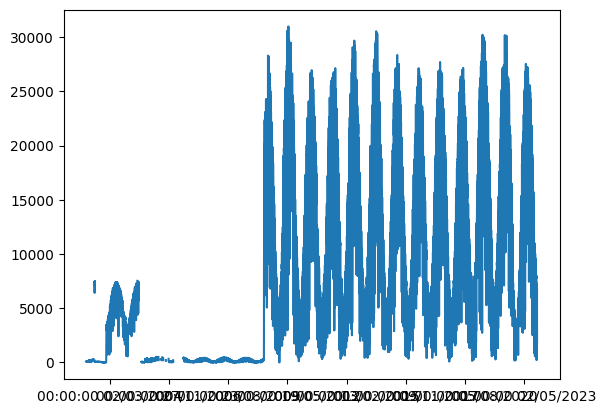

In [ ]:
df['Rad.Sol.Tot. (kJ/m2) Total'].plot()

<Axes: >

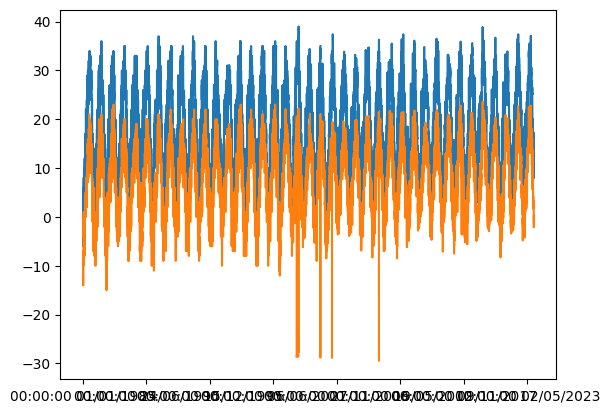

In [ ]:
df['Temp. aria (°C) Max'].plot()
df['Temp. aria (°C) Min'].plot()

In [ ]:
df[df['Temp. aria (°C) Min']<-20]

,Pioggia (mm) Total,Pioggia (mm) Total Qual,Temp. aria (°C) Mean,Temp. aria (°C) Mean Qual,Temp. aria (°C) Min,Temp. aria (°C) Min Qual,Temp. aria (°C) Max,Temp. aria (°C) Max Qual,Umidita' aria (%) Mean,Umidita' aria (%) Mean Qual,Dir. Vento (°) Mean,Dir. Vento (°) Mean Qual,Vel. Vento (m/s) Mean,Vel. Vento (m/s) Mean Qual,Pressione atm. (hPa) Mean,Pressione atm. (hPa) Mean Qual,Rad.Sol.Tot. (kJ/m2) Total,Rad.Sol.Tot. (kJ/m2) Total Qual,data
data,,,,,,,,,,,,,,,,,,,
2003-06-09,0.2,1,25.0,1,-28.6,140,34.1,1,54.8,1,157.0,1,0.4,140,980.3,1,235.0,140,2003-06-09
2003-06-10,0.0,1,NaN,255,-28.6,140,34.6,1,NaN,255,NaN,255,NaN,255,NaN,255,NaN,255,2003-06-10
2003-06-12,0.0,1,26.7,1,-25.6,140,36.0,1,55.1,1,158.0,1,1.4,140,982.2,1,7300.0,140,2003-06-12
2003-06-13,1.6,1,26.2,1,-25.6,140,36.0,1,56.0,1,183.0,1,1.1,140,981.3,1,7163.0,140,2003-06-13
2003-07-19,0.0,1,25.9,1,-28.6,140,34.1,1,50.5,1,178.0,1,2.0,1,981.6,1,71.8,140,2003-07-19
2003-07-20,0.0,1,26.7,1,-28.6,140,34.6,1,49.3,1,157.0,1,2.4,1,979.8,1,68.2,140,2003-07-20
2003-07-21,2.8,1,25.0,1,-27.9,140,34.6,1,58.1,1,191.0,1,2.2,1,980.8,1,68.4,140,2003-07-21
2003-08-03,0.0,1,27.4,1,-28.5,140,36.7,1,50.0,1,166.0,1,1.8,1,983.2,1,70.5,140,2003-08-03
2003-08-05,0.0,1,29.0,1,-25.1,140,36.7,1,50.7,1,153.0,1,1.7,1,983.7,1,65.5,140,2003-08-05


<Axes: >

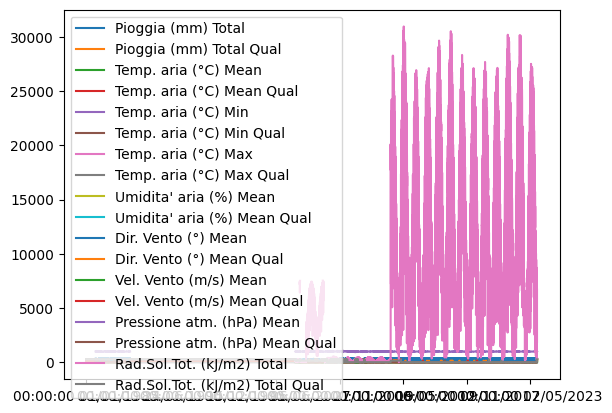

In [ ]:
df.plot()

### Convertire indice in datetime

Esiste una funzione per convertire tutti gli elementi di una colonna di un dataframe in datetime: `pd.to_datetime()`. Controllare gli argomenti della funzione e utilizzarla per convertire l'indice.

In [ ]:
df["data"]=pd.to_datetime(df.index, format="%H:%M:%S %d/%m/%Y")

In [ ]:
type(df["data"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# df.index[0].year non è un datetima ma una stringa
df.data[0].year

1985

In [ ]:
df['Temp. aria (°C) Max Qual'] # serie
df['Temp. aria (°C) Max Qual'].values # solo i valore, array


array([  1,   1,   1, ..., 255, 255, 255])

In [ ]:
df.index=df.data.values # assegna solo i valori
df.index=df.data   # prende la colonna

In [ ]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: xlabel='data'>

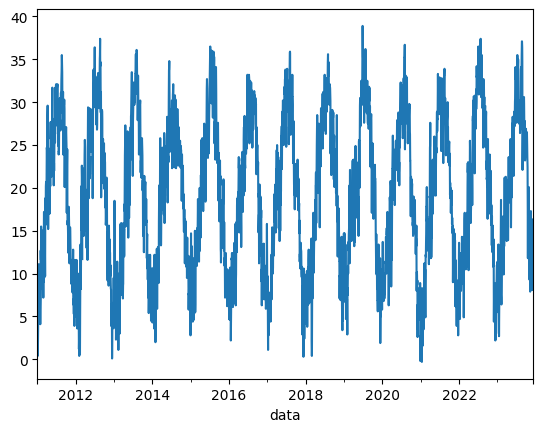

In [ ]:
df[df.index.year>2010]['Temp. aria (°C) Max'].plot()

## Qualità dei dati



### Dizionario con indici di qualità

Dal file originario ci creiamo un dizionario con le informazioni sulla qualità dei dati

Qualities:
* 1 - Dato buono
* 70 - dato stimato
* 76 - dato interpolato affidabile
* 140 - dato incerto, per analisi climatiche o malfunzionamento stazione
* 145 - da teletrasmissione, non validato
* 151 - Dato mancante
* 255 - No data



In [ ]:
info_qual = {1: "Dato buono", 70: "dato stimato", 76: "dato interpolato affidabile", 140: "dato incerto, per analisi climatiche o malfunzionamento stazione", 145: "da teletrasmissione, non validato", 151: "Dato mancante", 255: "No data"}

Facciamo un ciclo per capire qual è la qualità di ogni dato e contiamo per ogni colonna quanti dati abbiamo per ogni tipologia presente nel dizionario.

Creiamo poi una funzione che dato il dizionario e il df ci stampa le informazioni sui dati.

In [ ]:
for num, label in info_qual.items(): # num = 1  e label è "Dato buono", item è chiave e valore
  print("-----------------")
  print(label)
  print("-----------------")
  for col in df.columns:
    if "Qual" in col:
      print(f"{col}: {len(df[df[col]==num])/len(df): 3.2f}") # con 3.2f formatto il float

-----------------
Dato buono
-----------------
Pioggia (mm) Total Qual:  0.59
Temp. aria (°C) Mean Qual:  0.60
Temp. aria (°C) Min Qual:  0.97
Temp. aria (°C) Max Qual:  0.98
Umidita' aria (%) Mean Qual:  0.58
Dir. Vento (°) Mean Qual:  0.56
Vel. Vento (m/s) Mean Qual:  0.54
Pressione atm. (hPa) Mean Qual:  0.58
Rad.Sol.Tot. (kJ/m2) Total Qual:  0.42
-----------------
dato stimato
-----------------
Pioggia (mm) Total Qual:  0.00
Temp. aria (°C) Mean Qual:  0.00
Temp. aria (°C) Min Qual:  0.00
Temp. aria (°C) Max Qual:  0.00
Umidita' aria (%) Mean Qual:  0.00
Dir. Vento (°) Mean Qual:  0.00
Vel. Vento (m/s) Mean Qual:  0.00
Pressione atm. (hPa) Mean Qual:  0.00
Rad.Sol.Tot. (kJ/m2) Total Qual:  0.00
-----------------
dato interpolato affidabile
-----------------
Pioggia (mm) Total Qual:  0.00
Temp. aria (°C) Mean Qual:  0.00
Temp. aria (°C) Min Qual:  0.00
Temp. aria (°C) Max Qual:  0.00
Umidita' aria (%) Mean Qual:  0.00
Dir. Vento (°) Mean Qual:  0.00
Vel. Vento (m/s) Mean Qual:  0.00

In [ ]:
df['Pioggia (mm) Total Qual']==255 # colonna con veri e falsi a seconda della condizioni
# nelle quadre posso passare una colonna di veri e falsi
df[df['Pioggia (mm) Total Qual']==255] # mi restituisce le righe dove la condizione è vera

,Pioggia (mm) Total,Pioggia (mm) Total Qual,Temp. aria (°C) Mean,Temp. aria (°C) Mean Qual,Temp. aria (°C) Min,Temp. aria (°C) Min Qual,Temp. aria (°C) Max,Temp. aria (°C) Max Qual,Umidita' aria (%) Mean,Umidita' aria (%) Mean Qual,Dir. Vento (°) Mean,Dir. Vento (°) Mean Qual,Vel. Vento (m/s) Mean,Vel. Vento (m/s) Mean Qual,Pressione atm. (hPa) Mean,Pressione atm. (hPa) Mean Qual,Rad.Sol.Tot. (kJ/m2) Total,Rad.Sol.Tot. (kJ/m2) Total Qual,data
data,,,,,,,,,,,,,,,,,,,
1985-01-01,NaN,255,NaN,255,-7.0,1,2.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255,1985-01-01
1985-01-02,NaN,255,NaN,255,-7.0,1,5.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255,1985-01-02
1985-01-03,NaN,255,NaN,255,-9.0,1,5.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255,1985-01-03
1985-01-04,NaN,255,NaN,255,-9.0,1,-1.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255,1985-01-04
1985-01-05,NaN,255,NaN,255,-11.0,1,-1.0,1,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255,1985-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-06,NaN,255,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255,NaN,255,NaN,255,NaN,255,2012-03-06
2012-03-07,NaN,255,NaN,255,NaN,151,NaN,151,NaN,255,NaN,151,NaN,151,NaN,255,NaN,255,2012-03-07
2012-03-08,NaN,255,NaN,255,NaN,151,15.3,1,NaN,255,NaN,151,NaN,151,NaN,255,12041.8,1,2012-03-08


### Plot

Facciamo un ciclo per plottare tutti i dati grezzi. Osserviamo che i valori sono nelle colonne pari. Usiamo la libreria matplotlib per creare dei plot per ogni variabile.
```
import matplotlib.pyplot as plt
plt.subplots(nrows=9, ncols=1)
```



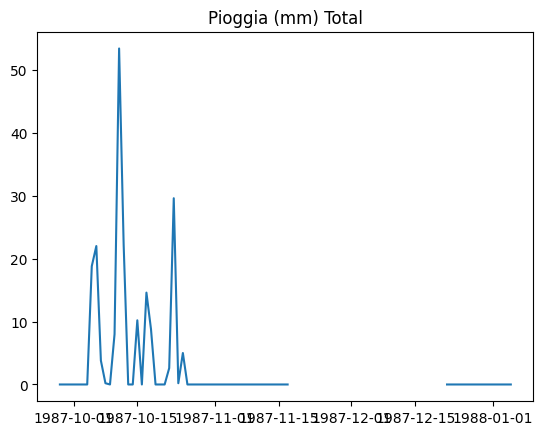

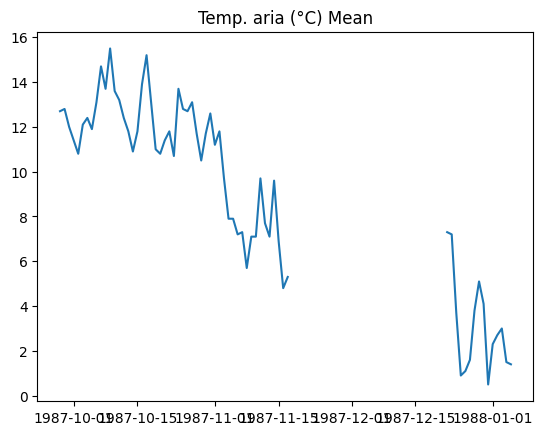

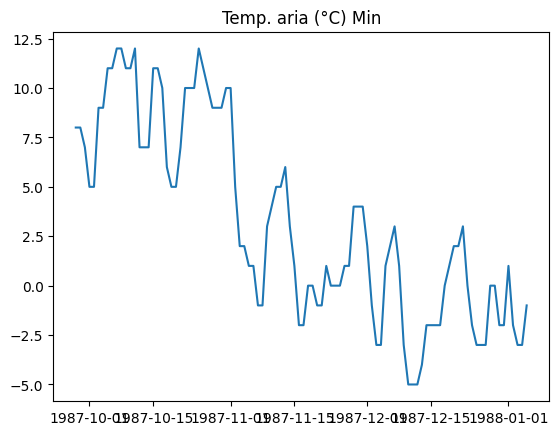

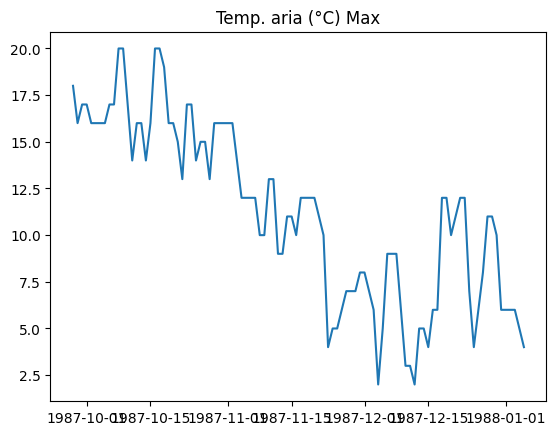

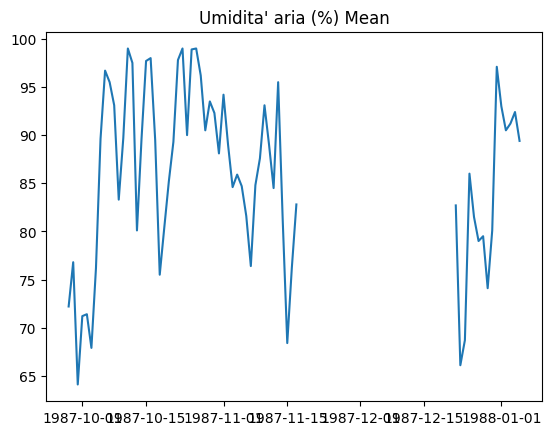

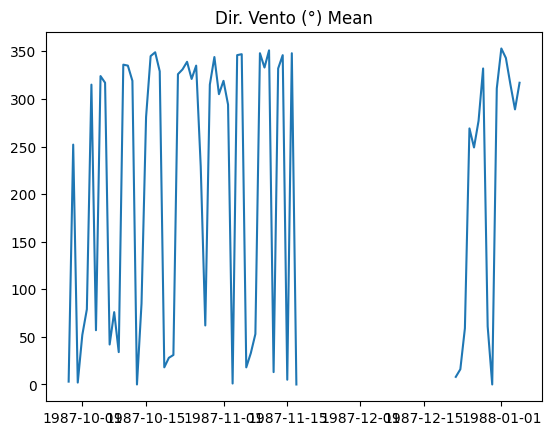

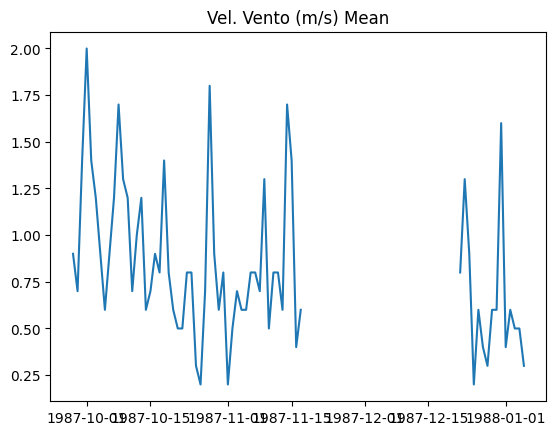

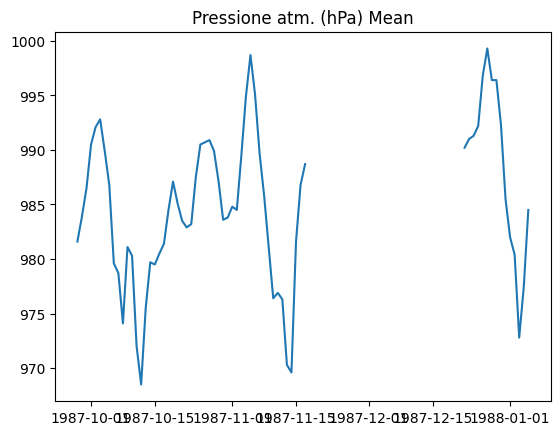

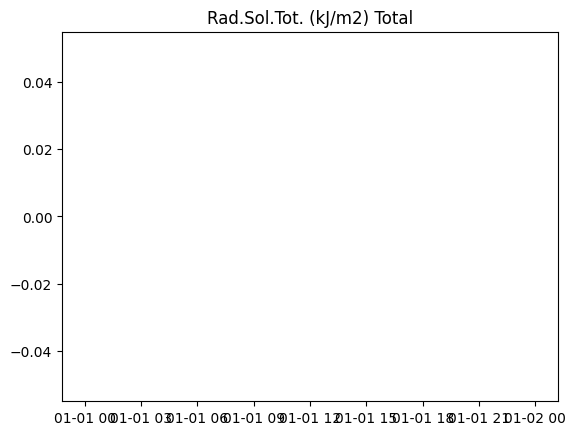

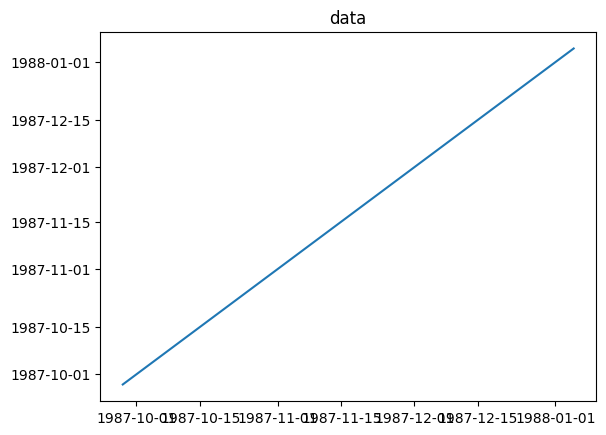

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, len(df.columns), 2):
  fig, ax = plt.subplots()
  ax.plot(df[1000:1100].index, df.iloc[1000:1100,i])
  ax.set_title(df.columns[i])

In [ ]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

Osserviamo che i valori iniziano a essere rilevati con continuità dal 2003 circa. Riplottiamo i grafici dall'inizio del 2000.

Osserviamo che possiamo considerare i dati dalla prima data utile.

`df[df.index.year>2000]['Temp. aria (°C) Mean'].first_valid_index()`

Creiamo una deep copy dei dati da gennaio del 2004 e ricontrolliamo le informazioni sui dati.

Proviamo a fare una heatmap delle info sulla qualità dei dati. Importiamo una nuova libreria utile per i grafici.

`import seaborn as sns`